In [1]:
import numpy as np
import matplotlib.pyplot as plt

import kde_funcs as kde

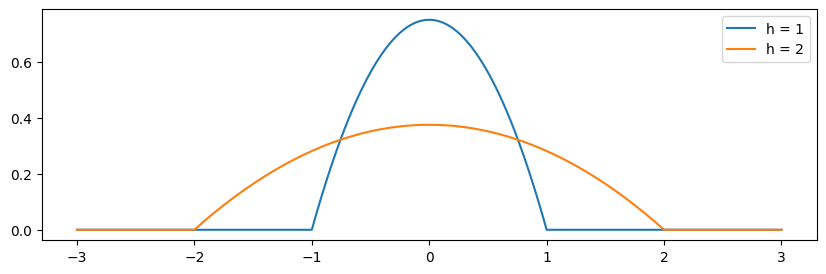

In [2]:
h = 2
x_arr = np.linspace(-3, 3, 1000)

plt.figure(figsize=(10, 3))
plt.plot(x_arr, kde.kernel_epa(x_arr), label='h = 1')
plt.plot(x_arr, (1/h) * kde.kernel_epa(x_arr / h), label=f'h = {h}')

plt.legend()
plt.show()

In [3]:
""" 
VL - Nichtparametrische Stat 

Def 4.2 Nadaraya-Watson-Schätzer

f_{n, h}^{NW} (x) = \frac {\sum Y_i K(x-x_i)}{\sum K(x-x_i)}} 

"""

' \nVL - Nichtparametrische Stat \n\nDef 4.2 Nadaraya-Watson-Schätzer\n\nf_{n, h}^{NW} (x) = \x0crac {\\sum Y_i K(x-x_i)}{\\sum K(x-x_i)}} \n\n'

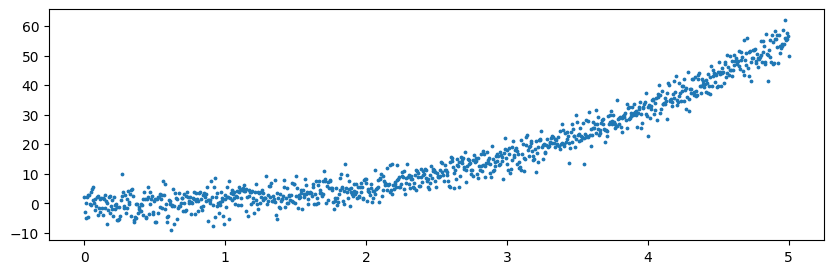

In [4]:
# generate data using trend = x^2 and gaussian noise

n = 1000
x = np.linspace(0, 5, n).reshape(-1, 1)
y = x**2.5 + np.random.normal(0, 3, n).reshape(-1, 1)

plt.figure(figsize=(10, 3))
plt.scatter(x, y, s=3)
plt.show()

In [5]:
def nadaraya_watson(x, y, x_pred, kernel, h=1):

    """
    Nadaraya-Watson kernel regression estimator
    """

    y_pred = np.zeros(x_pred.shape[0])

    if kernel == 'epa':
        kernel_func = kde.kernel_epa
    if kernel == 'gauss':
        kernel_func = kde.kernel_gauss
    if kernel == 'rect':
        kernel_func = kde.kernel_rect
    if kernel == 'tri':
        kernel_func = kde.kernel_tri
    if kernel == 'sinc':
        kernel_func = kde.kernel_sinc

    for i, x0 in enumerate(x_pred):
        
        # calculate weights
        w = kernel_func((x - x0) / h)
        # calculate prediction
        y_pred[i] = np.sum(w * y) / np.sum(w)

    return y_pred

c:\Users\ytl_c\OneDrive\Desktop\23_24 WS (Master)\Kernel Simulations\kde_funcs.py:32: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, (1/np.pi), np.sin(x) / (np.pi * x))


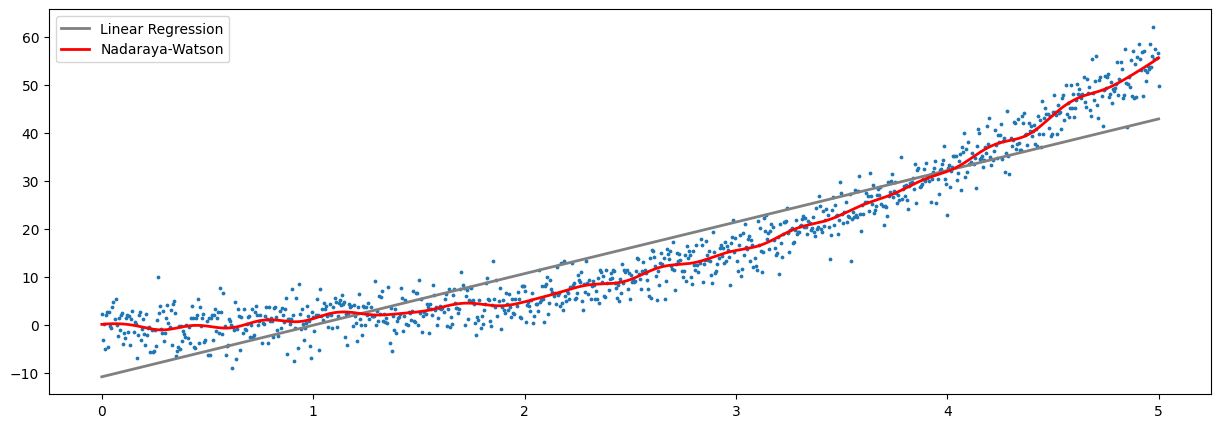

In [6]:
from sklearn.linear_model import LinearRegression

# Fit Linear Regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Use Nadaraya-Watson Estimator
y_pred_nw = nadaraya_watson(x, y, x, 'sinc', h=0.05)

# Plot the original data and the regression line
plt.figure(figsize=(15, 5))
plt.scatter(x, y, s=3)
plt.plot(x, y_pred, color='grey', lw=2, label='Linear Regression')
plt.plot(x, y_pred_nw, color='red', lw=2, label='Nadaraya-Watson')

plt.legend()
plt.show()
